# 使用Face-Recognition套件進行臉部追蹤
### 程式修改自 [face-recognition GitHub Examples](https://github.com/ageitgey/face_recognition)

## 載入相關套件

In [1]:
# 安裝套件： pip install face-recognition
# 載入相關套件
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import face_recognition
import cv2
import numpy as np

## 載入並顯示圖檔

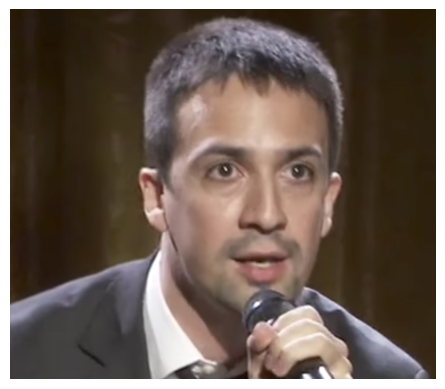

In [2]:
# 載入圖檔
image_file = "../images_face/lin-manuel-miranda.png"
image = plt.imread(image_file)

# 顯示圖像
plt.imshow(image)
plt.axis('off')
plt.show()

## 載入影片檔

In [3]:
# 載入影片檔
input_movie = cv2.VideoCapture("../images_face/short_hamilton_clip.mp4")
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))
print(f'影片幀數：{length}')

影片幀數：275


In [4]:
# 指定輸出檔名
fourcc = cv2.VideoWriter_fourcc(*'XVID')
# 每秒幀數(fps):29.97，影片解析度(Frame Size)：(640, 360)
output_movie = cv2.VideoWriter('../images_face/output.avi', 
                               fourcc, 29.97, (640, 360))

## 載入要辨識的圖像

In [5]:
# 載入要辨識的圖像
image_file = 'lin-manuel-miranda.png' # 美國歌手
lmm_image = face_recognition.load_image_file("../images_face/"+image_file)
# 取得圖像編碼
lmm_face_encoding = face_recognition.face_encodings(lmm_image)[0]

# obama
image_file = 'obama.jpg' # 美國總統
obama_image = face_recognition.load_image_file("../images_face/"+image_file)
# 取得圖像編碼
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# 設定陣列
known_faces = [
    lmm_face_encoding,
    obama_face_encoding
]

# 目標名稱
target_face_names = ['lin-manuel-miranda', 'obama']

## 比對臉部並存檔

In [6]:
# 變數初始化
face_locations = [] # 臉部位置
face_encodings = [] # 臉部編碼
frame_number = 0    # 幀數

In [7]:
# 偵測臉部並寫入輸出檔
while(input_movie.isOpened()):    
    # 讀取一幀影像
    ret, frame = input_movie.read()
    frame_number += 1

    # 影片播放結束，即跳出迴圈
    if not ret:
        break
        # 會造成記憶體不足
        # print("Cannot receive frame")   # 如果讀取錯誤，印出訊息
        # continue

    # 將 BGR 色系轉為 RGB 色系
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # rgb_frame = np.ascontiguousarray(frame[:, :, ::-1])
    
    # 找出臉部位置
    face_locations = face_recognition.face_locations(rgb_frame)
    # 編碼
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    # 比對臉部
    face_names = []
    for face_encoding in face_encodings:
        # 比對臉部編碼是否與圖檔符合
        match = face_recognition.compare_faces(known_faces, face_encoding, 
                                               tolerance=0.50)

        # 找出符合臉部的名稱
        # print(len(match))
        name = None
        for i in range(len(match)):
            if match[i] and i < len(target_face_names):
                name = target_face_names[i]
                break

        face_names.append(name)      
        
    # 輸出影片標記臉部位置及名稱
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        if not name:
            continue

        # 加框
        # print(top, right, bottom, left)
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # 標記名稱
        cv2.rectangle(frame, (left, bottom - 25), (right, bottom), (0, 0, 255)
                      , cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, 
                    (255, 255, 255), 1)

    # 將每一幀影像存檔
    # print("Writing frame {} / {}".format(frame_number, length))
    output_movie.write(frame)
        
# 關閉輸入檔    
input_movie.release()
output_movie.release()
print('Save ../images_face/output.avi OK')
# 關閉所有視窗
cv2.destroyAllWindows()

Save ../images_face/output.avi OK
